## Credit card payment default
Dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud")

In [4]:
pd.options.display.max_columns = None

## 1. Display Top 5 Rows of The Dataset

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Check Last 5 Rows of The Dataset

In [6]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [7]:
data.shape

(284807, 31)

In [8]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 284807
Number of Columns 31


## 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## 5. Check Null Values In The Dataset

In [10]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [13]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [14]:
data = data.drop(['Time'],axis=1)

In [15]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [16]:
data.shape

(284807, 30)

In [17]:
data.duplicated().any()

True

## Remove Duplicated Values

In [18]:
data = data.drop_duplicates()

In [19]:
data.shape

(275663, 30)

In [20]:
284807- 275663

9144

## 6. Not Handling Imbalanced

In [21]:
data['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

In [22]:
import seaborn as sns

<AxesSubplot:xlabel='Class', ylabel='count'>

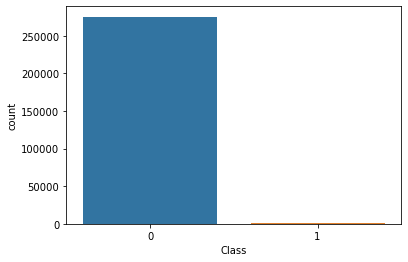

In [23]:
sns.countplot(data['Class'])

## 7. Store Feature Matrix In X And Response (Target) In Vector y

In [24]:
X = data.drop('Class',axis=1)
y = data['Class']

## 8. Splitting The Dataset Into The Training Set And Test Set

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

## 9. Handling Imbalanced Dataset
## Undersampling

In [26]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [27]:
normal.shape

(275190, 30)

In [28]:
fraud.shape

(473, 30)

In [29]:
normal_sample=normal.sample(n=473)

In [30]:
normal_sample.shape

(473, 30)

In [31]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [32]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [33]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.318456,-0.517950,2.383744,-2.281732,0.037896,-0.224623,0.493365,-0.446360,-0.777984,0.268800,0.693340,0.735621,1.192188,-1.104620,-1.436869,-0.752142,-1.182391,1.499479,-1.802295,-0.524243,-0.325695,-0.053351,-0.512570,0.087966,0.398547,0.625578,-0.550691,-0.355689,-0.034662,0
1,0.071977,0.908858,-0.351550,-0.612339,0.837872,-0.600797,0.848727,0.062896,-0.220643,-0.652218,1.014419,0.269988,-0.743948,-0.683128,-0.877512,0.521562,0.199288,0.319443,0.014193,0.004617,-0.283235,-0.752461,0.127410,0.642113,-0.486560,0.088571,0.211358,0.074954,-0.310170,0
2,-0.325028,0.378755,0.815547,-1.334119,0.581168,0.443760,0.556008,0.188079,0.206138,-0.885109,-0.534303,0.292709,0.017196,0.051415,-0.385549,0.766177,-1.328545,0.780126,0.728493,0.013984,-0.159052,-0.522704,-0.034374,-1.425802,-0.541280,-0.320565,0.139292,0.158355,-0.153525,0
3,-0.241714,2.061641,-0.225212,3.113260,1.469521,-0.686850,1.388433,-0.257748,-1.150039,0.301669,-0.737869,-1.901997,-1.815509,-2.635484,-0.826794,1.659784,1.246134,0.680625,-1.928290,-0.100425,-0.437245,-1.175340,0.030288,-0.394723,-0.540491,-0.445868,-0.129777,-0.057325,-0.328921,0
4,2.038835,-0.064598,-1.196650,0.191873,0.209349,-0.557263,0.111685,-0.180761,0.189754,0.211297,0.783954,1.429632,0.823890,0.298849,-0.669286,0.112494,-0.671960,-0.428499,0.508809,-0.156413,-0.248853,-0.572807,0.275670,-0.444761,-0.264039,0.205712,-0.066846,-0.073016,-0.345313,0


In [34]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

## 10. Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [37]:
y_pred1 = log.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,y_pred1)

0.9421052631578948

In [40]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [41]:
precision_score(y_test,y_pred1)

0.9789473684210527

In [42]:
recall_score(y_test,y_pred1)

0.9117647058823529

In [43]:
f1_score(y_test,y_pred1)

0.9441624365482234

## 11. Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [45]:
y_pred2 = dt.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred2)

0.9263157894736842

In [47]:
precision_score(y_test,y_pred2)

0.9074074074074074

In [48]:
recall_score(y_test,y_pred2)

0.9607843137254902

In [49]:
f1_score(y_test,y_pred2)

0.9333333333333333

## 12. Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
y_pred3 = rf.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred3)

0.9315789473684211

In [53]:
precision_score(y_test,y_pred3)

0.968421052631579

In [54]:
recall_score(y_test,y_pred3)

0.9019607843137255

In [55]:
f1_score(y_test,y_pred3)

0.934010152284264

In [56]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [57]:
final_data

,Models,ACC
0,LR,94.210526
1,DT,92.631579
2,RF,93.157895


<AxesSubplot:xlabel='Models', ylabel='ACC'>

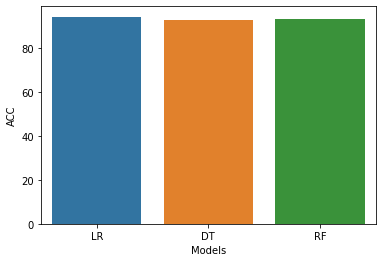

In [58]:
sns.barplot(final_data['Models'],final_data['ACC'])

## Oversampling

In [59]:
X = data.drop('Class',axis=1)
y = data['Class']

In [60]:
X.shape

(275663, 29)

In [64]:
y.shape

(275663,)

In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
X_res,y_res = SMOTE().fit_resample(X,y)
                                  

In [67]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,
                                                 random_state=42)

## 10. Logistic Regression

In [69]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [70]:
y_pred1 = log.predict(X_test)

In [71]:
accuracy_score(y_test,y_pred1)

0.9432392165412987

In [72]:
precision_score(y_test,y_pred1)

0.9731565769297956

In [73]:
recall_score(y_test,y_pred1)

0.9115502790756868

In [74]:
f1_score(y_test,y_pred1)

0.9413465510119785

## 11. Decision Tree Classifier

In [75]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [76]:
y_pred2 = dt.predict(X_test)

In [77]:
accuracy_score(y_test,y_pred2)

0.9978741960100295

In [78]:
precision_score(y_test,y_pred2)

0.9972580850175229

In [79]:
recall_score(y_test,y_pred2)

0.998490991400469

In [80]:
f1_score(y_test,y_pred2)

0.9978741573850319

## 12. Random Forest Classifier

In [81]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [82]:
y_pred3 = rf.predict(X_test)

In [83]:
accuracy_score(y_test,y_pred3)

0.9999273229405138

In [84]:
precision_score(y_test,y_pred3)

0.9998545745396376

In [85]:
recall_score(y_test,y_pred3)

1.0

In [86]:
f1_score(y_test,y_pred3)

0.9999272819822931

In [87]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})


In [88]:
final_data


,Models,ACC
0,LR,94.323922
1,DT,99.787420
2,RF,99.992732


<AxesSubplot:xlabel='Models', ylabel='ACC'>

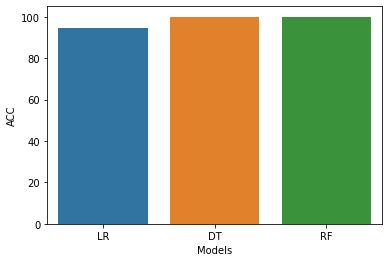

In [89]:
sns.barplot(final_data['Models'],final_data['ACC'])

## Save The Model

In [90]:
rf1 = RandomForestClassifier()
rf1.fit(X_res,y_res)

RandomForestClassifier()

In [91]:
import joblib


In [92]:
joblib.dump(rf1,"credit_card_model")


['credit_card_model']

In [93]:
model = joblib.load("credit_card_model")

In [94]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

In [95]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Normal Transcation
